<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Forecastingprac15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
walmart = pd.read_csv('/content/footfalls.csv')

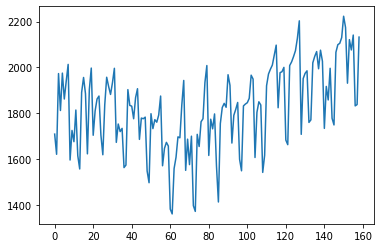

In [5]:
walmart.Footfalls.plot()

In [6]:
train = walmart.head(147)
test = walmart.tail(12)

In [7]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

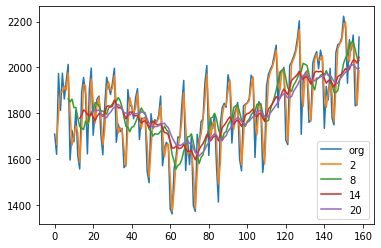

In [8]:
walmart['Footfalls'].plot(label='org')
for i in range(2,24,6):
  walmart['Footfalls'].rolling(i).mean().plot(label =str(i))
plt.legend(loc='best')

In [9]:
decompose = seasonal_decompose(walmart.Footfalls,freq=12)

In [10]:
%matplotlib inline

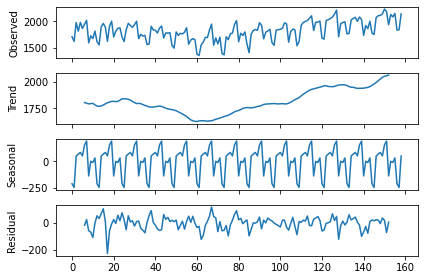

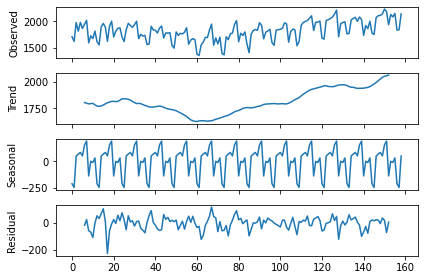

In [11]:
decompose.plot()

In [12]:
import statsmodels.graphics.tsaplots as tsa_plots

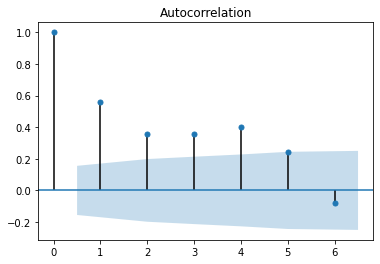

In [13]:
a = tsa_plots.plot_acf(walmart.Footfalls,lags=6)

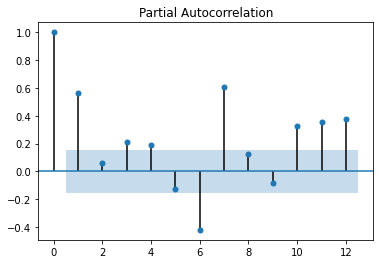

In [14]:
b = tsa_plots.plot_pacf(walmart.Footfalls,lags=12)

In [15]:
def MAPE(pred,org):
  temp = np.abs((pred-org)/org)*100
  return np.mean(temp)

In [16]:
ses_model = SimpleExpSmoothing(train.Footfalls).fit(smoothing_level=0.2)
ses_pred = ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(ses_pred,test.Footfalls)

8.490637057828364

In [17]:
holt = Holt(train.Footfalls).fit(smoothing_level=0.8,smoothing_slope=0.2)
holt_pred = holt.predict(test.index[0],test.index[-1])
MAPE(holt_pred,test.Footfalls)

7.546249229496066

In [18]:
holt_win = ExponentialSmoothing(train.Footfalls,trend='add',seasonal='add',seasonal_periods=12).fit()
holt_win_predict = holt_win.predict(start = test.index[0],end=test.index[-1])
MAPE(holt_win_predict,test.Footfalls)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


3.159669764222986

In [19]:
holt_new = ExponentialSmoothing(train.Footfalls,seasonal='mul',trend = 'add',seasonal_periods=12).fit()
holt_win_predict1 = holt_new.predict(start=test.index[0],end=test.index[-1])
MAPE(holt_win_predict1,test.Footfalls)

3.118475269462364

In [20]:
new_model =ExponentialSmoothing(walmart.Footfalls,seasonal='mul',trend='add',seasonal_periods=12).fit()
new_model_pre = new_model.predict(start=test.index[0],end=test.index[-1])
MAPE(new_model_pre,test.Footfalls)

1.7826438309355395

In [21]:
a = new_model.forecast(10)

In [22]:
a

159    2156.789567
160    2188.299546
161    2147.097980
162    2263.990169
163    2305.817195
164    1932.061970
165    2098.495872
166    2084.574705
167    2136.439741
168    1857.566130
dtype: float64

In [23]:
df = pd.DataFrame(a,columns=['forecast'])

In [24]:
df

,forecast
159,2156.789567
160,2188.299546
161,2147.097980
162,2263.990169
163,2305.817195
164,1932.061970
165,2098.495872
166,2084.574705
167,2136.439741
168,1857.566130


In [25]:
import statsmodels.api as sm
import itertools
import warnings

In [26]:
data = pd.read_csv('/content/water.csv',header=0,index_col=0,parse_dates=True)


In [27]:
data

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


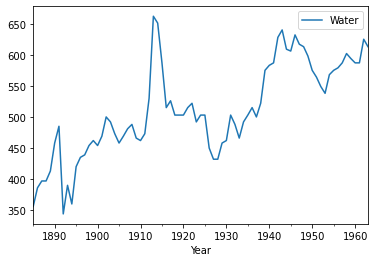

In [28]:
data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b37425610>]],
      dtype=object)

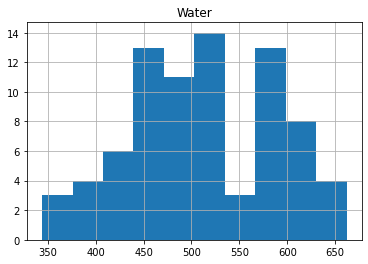

In [29]:
data.hist()

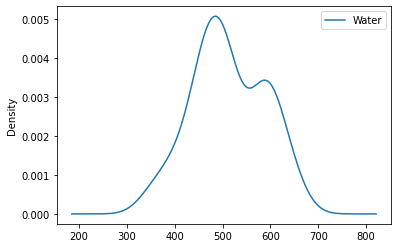

In [30]:
data.plot(kind='kde')

In [31]:
split_point = len(data)-10

In [32]:
dataset, validation = data[0:split_point], data[split_point:]

In [33]:
print('dataset %d, validation %d' % (len(dataset),len(validation)))

dataset 69, validation 10


In [34]:
dataset.to_csv('dataset',header=False)
validation.to_csv('validation',header=False)

In [35]:
from sklearn.metrics import mean_squared_error

In [56]:
train = pd.read_csv('/content/dataset',parse_dates=True,squeeze=True,header=None,index_col=0)
X= train.values

In [57]:
X

array([356, 386, 397, 397, 413, 458, 485, 344, 390, 360, 420, 435, 439,
       454, 462, 454, 469, 500, 492, 473, 458, 469, 481, 488, 466, 462,
       473, 530, 662, 651, 587, 515, 526, 503, 503, 503, 515, 522, 492,
       503, 503, 450, 432, 432, 458, 462, 503, 488, 466, 492, 503, 515,
       500, 522, 575, 583, 587, 628, 640, 609, 606, 632, 617, 613, 598,
       575, 564, 549, 538])

In [58]:
X = X.astype('float32')

In [59]:
X

array([356., 386., 397., 397., 413., 458., 485., 344., 390., 360., 420.,
       435., 439., 454., 462., 454., 469., 500., 492., 473., 458., 469.,
       481., 488., 466., 462., 473., 530., 662., 651., 587., 515., 526.,
       503., 503., 503., 515., 522., 492., 503., 503., 450., 432., 432.,
       458., 462., 503., 488., 466., 492., 503., 515., 500., 522., 575.,
       583., 587., 628., 640., 609., 606., 632., 617., 613., 598., 575.,
       564., 549., 538.], dtype=float32)

In [60]:
train_size = int(len(X)*0.50)

In [61]:
train_size

34

In [62]:
train,test = X[0:train_size],X[train_size:]

In [63]:
range(len(test))

range(0, 35)

In [64]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  yhat = history[-1]
  predictions.append(yhat)
  obs=test[i]
  history.append(obs)
  print('exp = %.3f,obs=%.3f' % (yhat,obs))

exp = 503.000,obs=503.000
exp = 503.000,obs=503.000
exp = 503.000,obs=515.000
exp = 515.000,obs=522.000
exp = 522.000,obs=492.000
exp = 492.000,obs=503.000
exp = 503.000,obs=503.000
exp = 503.000,obs=450.000
exp = 450.000,obs=432.000
exp = 432.000,obs=432.000
exp = 432.000,obs=458.000
exp = 458.000,obs=462.000
exp = 462.000,obs=503.000
exp = 503.000,obs=488.000
exp = 488.000,obs=466.000
exp = 466.000,obs=492.000
exp = 492.000,obs=503.000
exp = 503.000,obs=515.000
exp = 515.000,obs=500.000
exp = 500.000,obs=522.000
exp = 522.000,obs=575.000
exp = 575.000,obs=583.000
exp = 583.000,obs=587.000
exp = 587.000,obs=628.000
exp = 628.000,obs=640.000
exp = 640.000,obs=609.000
exp = 609.000,obs=606.000
exp = 606.000,obs=632.000
exp = 632.000,obs=617.000
exp = 617.000,obs=613.000
exp = 613.000,obs=598.000
exp = 598.000,obs=575.000
exp = 575.000,obs=564.000
exp = 564.000,obs=549.000
exp = 549.000,obs=538.000


In [65]:
print('exp = %.3f,obs=%.3f' % (yhat,obs))

exp = 549.000,obs=538.000


In [66]:
rmse = np.sqrt(mean_squared_error(test,predictions))

In [67]:
rmse

21.97466

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
import warnings

In [70]:
import sklearn.model_selection as sk


In [75]:
def evaluate_arima_model(X,arima_order):
  X= X.astype('float32')
  train_size = int(len(X)*0.50)
  train,test = X[0:train_size],X[train_size:]
  history = [x for x in train]
  predictions=()
  for t in range(len(test)):
    model = ARIMA(history, order = arima_order)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test(t))
  rmse = np.sqrt(mean_squared_error(test,predictions))
  return rmse

In [76]:
def evaluate_models(dataset,pvalue,dvalue,qvalue):
  dataset = dataset.astype('float32')
  best_score , best_config = float('inf'),None
  for p in pvalue:
    for d in dvalue:
      for q in qvalue:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(train,order)
          if rmse<best_score:
            best_score, best_config = rmse,order
            print('arima%s rmse=%.3f' % (order,rmse))
        except:
          continue
  print('best arima%s rmse=%.3f' % (best_config,best_score))

In [77]:
train = pd.read_csv('/content/dataset',parse_dates=True,squeeze=True,header=None,index_col=0)
pvalue = range(0,3)
dvalue=range(0,3)
qvalue=range(0,3)
warnings.filterwarnings('ignore')
evaluate_models(train.values, pvalue, dvalue, qvalue)

best arimaNone rmse=inf
